<a href="https://colab.research.google.com/github/SardarAmmer/DataScience-Projects-/blob/main/DEN_Task_4_(Coffee_Shop_Sales_Analysis).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# @title Data Cleaning

import pandas as pd
import numpy as np

df=pd.read_csv("/content/Coffee Shop Sales.csv")

display(df.head())
print(df.describe())

print("\nData Info:")
df.info()

print("\nMissing Values per Column:")
print(df.isnull().sum())

#checking duplicate values
print("dublicate Values")
print(df.duplicated())

#changing the transaction time format \
df['transaction_time'] = pd.to_datetime(df['transaction_time'], format='%H:%M:%S')

#converting non string objects
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].str.strip()
#Removing Spaces
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].str.strip()





# Check after Cleaning
print("\nDataset Shape after Cleaning:", df.shape)
print("\nMissing Values After Cleaning:")
print(df.isnull().sum())

# Preview final cleaned dataset
display(df.head())

#saving the Clean dataset
df.to_csv("/content/Cleaned_Coffee_Shop_Sales.csv")




,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail
0,1,01/01/2023,07:06:11,2,5,Lower Manhattan,32,3.0,Coffee,Gourmet brewed coffee,Ethiopia Rg
1,2,01/01/2023,07:08:56,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg
2,3,01/01/2023,07:14:04,2,5,Lower Manhattan,59,4.5,Drinking Chocolate,Hot chocolate,Dark chocolate Lg
3,4,01/01/2023,07:20:24,1,5,Lower Manhattan,22,2.0,Coffee,Drip coffee,Our Old Time Diner Blend Sm
4,5,01/01/2023,07:22:41,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg


       transaction_id  transaction_qty       store_id     product_id  \
count   149116.000000    149116.000000  149116.000000  149116.000000   
mean     74737.371872         1.438276       5.342063      47.918607   
std      43153.600016         0.542509       2.074241      17.930020   
min          1.000000         1.000000       3.000000       1.000000   
25%      37335.750000         1.000000       3.000000      33.000000   
50%      74727.500000         1.000000       5.000000      47.000000   
75%     112094.250000         2.000000       8.000000      60.000000   
max     149456.000000         8.000000       8.000000      87.000000   

          unit_price  
count  149116.000000  
mean        3.382219  
std         2.658723  
min         0.800000  
25%         2.500000  
50%         3.000000  
75%         3.750000  
max        45.000000  

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149116 entries, 0 to 149115
Data columns (total 11 columns):
 #   Column          

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail
0,1,01/01/2023,1900-01-01 07:06:11,2,5,Lower Manhattan,32,3.0,Coffee,Gourmet brewed coffee,Ethiopia Rg
1,2,01/01/2023,1900-01-01 07:08:56,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg
2,3,01/01/2023,1900-01-01 07:14:04,2,5,Lower Manhattan,59,4.5,Drinking Chocolate,Hot chocolate,Dark chocolate Lg
3,4,01/01/2023,1900-01-01 07:20:24,1,5,Lower Manhattan,22,2.0,Coffee,Drip coffee,Our Old Time Diner Blend Sm
4,5,01/01/2023,1900-01-01 07:22:41,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg


Columns in dataset: ['Unnamed: 0', 'transaction_id', 'transaction_date', 'transaction_time', 'transaction_qty', 'store_id', 'store_location', 'product_id', 'unit_price', 'product_category', 'product_type', 'product_detail']

Profitable Products:


,product_detail,transaction_qty,unit_price,total_sales,profit
0,Almond Croissant,1911,3.750988,7168.13,1792.0325
1,Brazilian - Organic,214,18.000000,3852.00,963.0000
2,Brazilian Lg,4317,3.500000,15109.50,3777.3750
3,Brazilian Rg,4385,3.000000,13155.00,3288.7500
4,Brazilian Sm,4310,2.200000,9482.00,2370.5000
...,...,...,...,...,...
75,Sustainably Grown Organic Lg,4453,4.750000,21151.75,5287.9375
76,Sustainably Grown Organic Rg,4329,3.750000,16233.75,4058.4375
77,Traditional Blend Chai,153,8.950000,1369.35,342.3375
78,Traditional Blend Chai Lg,4174,3.000000,12522.00,3130.5000



Products In Loss:


,product_detail,transaction_qty,unit_price,total_sales,profit


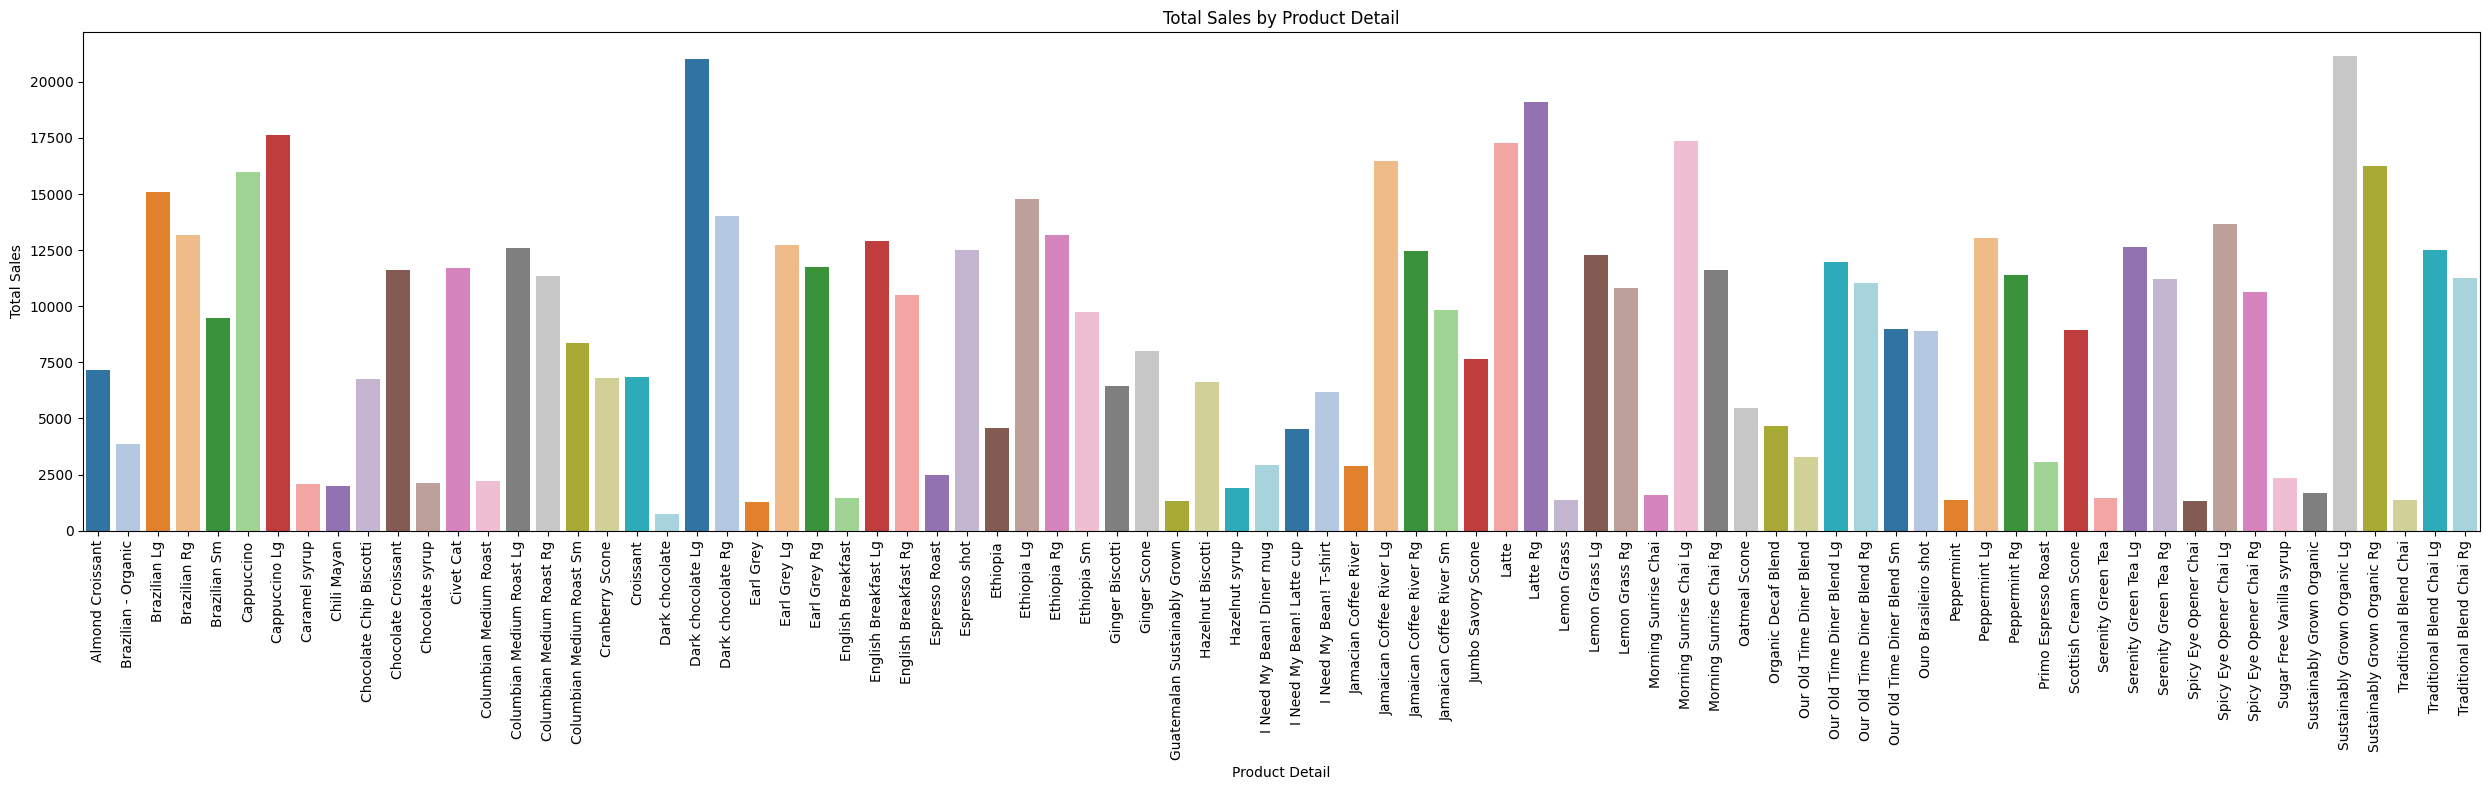

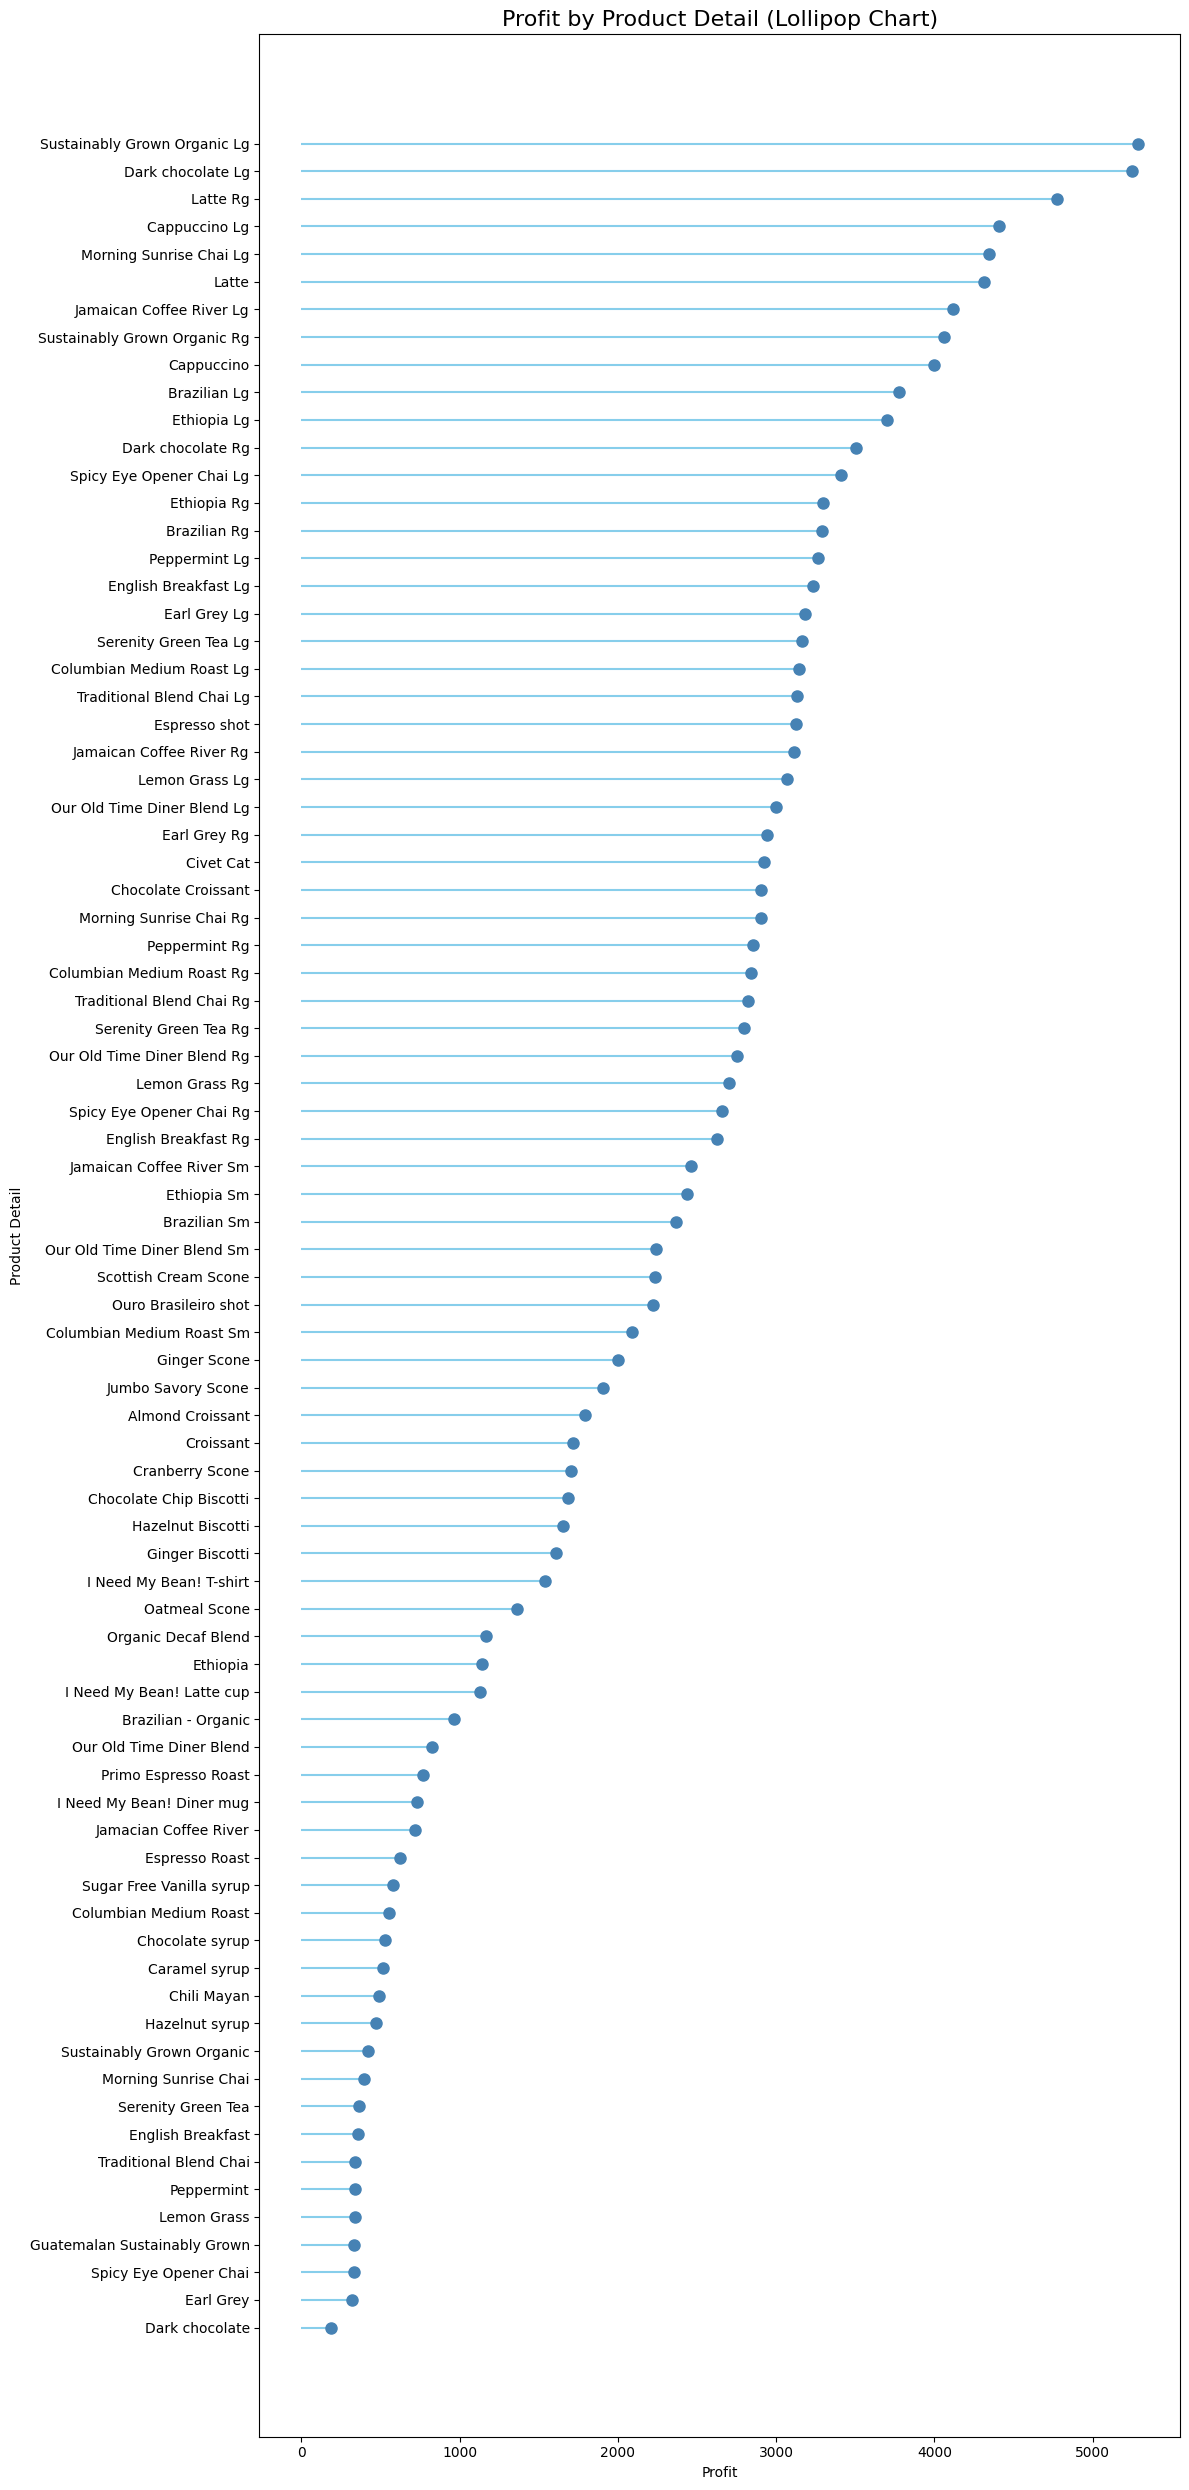

In [ ]:
# @title Profit Loss Analysis

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv("/content/Cleaned_Coffee_Shop_Sales.csv")

# 2. Quick check of column names (so we know the profit and sales columns)
print("Columns in dataset:", df.columns.tolist())
#Adding total sales column
df["total_sales"]=df['transaction_qty']*df['unit_price']

#Grouping by Product Details
Report_summary=df.groupby("product_detail").agg({
    'transaction_qty':'sum',
    'unit_price':'mean'
    'total_sales':'sum'
    }).reset_index()


#Estimate Profit (Assuming 25% margin for demonstration as no such data is provided in the dataset)

profit_margin = 0.25
Report_summary["profit"] = Report_summary["total_sales"] * profit_margin

#profit and loss Conditions
profit_products = Report_summary[Report_summary["profit"] > 0]
loss_products = Report_summary[Report_summary["profit"] <= 0]

print("\nProfitable Products:")
display(profit_products)

print("\nProducts In Loss:")
display(loss_products)

#Sales by Product Detail


plt.figure(figsize=(10,6))
sns.barplot(x="product_detail", y="total_sales", data=Report_summary, palette="Blues_d")
plt.title("Total Sales by Product Detail")
plt.xticks(rotation=90)
plt.ylabel("Total Sales")
plt.xlabel("Product Detail")
plt.tight_layout()
plt.show()

# 7. Profit by Product Detail (Profit/Loss Chart)
colors = ['green' if x > 0 else 'red' for x in Report_summary['profit']]
plt.figure(figsize=(10,6))
sns.barplot(x="product_detail", y="profit", data=Report_summary,palette=colors
plt.title("Profit/Loss by Product Detail")
plt.xticks(rotation=90)
plt.ylabel("Estimated Profit")
plt.xlabel("Product Detail")
plt.axhline(0, color='black', linewidth=1)
plt.tight_layout()
plt.show()

